# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = \frac{d}{dx} \left( x^{3} \ln(x) \right) = 3x^{2} \ln(x) + x^{2}$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
def dy(y, x_0, epsilon=1e-6):
    """
    Вычисляет приближенное значение производной функции y(x) в точке x_0.

    Параметры:
    y (function): Функция y(x), производную которой нужно вычислить.
    x_0 (float): Точка, в которой вычисляется производная.
    epsilon (float): Маленькое число для вычисления приближенной производной.

    Возвращаемое значение:
    float: Значение производной функции y(x) в точке x_0.
    """
    # Вычисляем значение функции в точке x_0
    y_x = y(x_0)

    # Вычисляем значение функции в точке x_0 + epsilon
    y_x_plus_epsilon = y(x_0 + epsilon)

    # Вычисляем приближенное значение производной
    derivative = (y_x_plus_epsilon - y_x) / epsilon

    return derivative


In [ ]:
# Определяем функцию y(x)
def y(x):
    return x**2 + 2*x + 1

# Вычисляем производную функции y(x) в точке x_0 = 2
x_0 = 2
derivative_at_x_0 = dy(y, x_0)
print("Значение производной в точке x_0:", derivative_at_x_0)

Значение производной в точке x_0: 6.000001000927568


3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_gd(func, gradient, x0, num_steps, lr, threshold):
    """
    Выполняет поиск минимума функции при помощи градиентного спуска.

    Параметры:
    func (function): Функция, минимум которой требуется найти.
    gradient (function): Функция, вычисляющая градиент функции func.
    x0 (float): Начальная точка поиска.
    num_steps (int): Количество шагов градиентного спуска.
    lr (float): Скорость обучения (learning rate).
    threshold (float): Пороговое значение изменения для завершения поиска.

    Возвращаемое значение:
    list: Список точек, полученных на каждом шаге градиентного спуска.
    """
    points = [x0]  # Список для хранения точек на каждом шаге

    for _ in range(num_steps):
        current_x = points[-1]  # Текущая точка

        # Вычисляем градиент функции в текущей точке
        grad = gradient(current_x)

        # Обновляем точку с учетом градиента и скорости обучения
        new_x = current_x - lr * grad

        # Добавляем новую точку в список
        points.append(new_x)

        # Вычисляем изменение между текущей и новой точкой
        change = abs(new_x - current_x)

        # Проверяем условие завершения поиска
        if change < threshold:
            break

    return points


In [ ]:
# Определяем функцию, градиент которой нужно вычислить
def func(x):
    return x**2 + 2*x + 1

# Определяем градиент функции func
def gradient(x):
    return 2*x + 2

# Начальная точка, количество шагов, скорость обучения и пороговое значение
x0 = 5
num_steps = 100
lr = 0.1
threshold = 1e-6

# Выполняем градиентный спуск
resulting_points = get_min_with_gd(func, gradient, x0, num_steps, lr, threshold)

# Выводим результаты
for i, point in enumerate(resulting_points):
    print(f"Шаг {i}: x = {point}, y = {func(point)}")

Шаг 0: x = 5, y = 36
Шаг 1: x = 3.8, y = 23.04
Шаг 2: x = 2.84, y = 14.7456
Шаг 3: x = 2.072, y = 9.437184
Шаг 4: x = 1.4576, y = 6.03979776
Шаг 5: x = 0.9660799999999999, y = 3.8654705664
Шаг 6: x = 0.5728639999999999, y = 2.473901162496
Шаг 7: x = 0.2582911999999999, y = 1.5832967439974397
Шаг 8: x = 0.00663295999999991, y = 1.0133099161583614
Шаг 9: x = -0.1946936320000001, y = 0.6485183463413513
Шаг 10: x = -0.3557549056000001, y = 0.4150517416584647
Шаг 11: x = -0.4846039244800001, y = 0.2656331146614175
Шаг 12: x = -0.5876831395840001, y = 0.1700051933833071
Шаг 13: x = -0.6701465116672001, y = 0.10880332376531654
Шаг 14: x = -0.73611720933376, y = 0.06963412720980267
Шаг 15: x = -0.788893767467008, y = 0.044565841414273666
Шаг 16: x = -0.8311150139736064, y = 0.028522138505135186
Шаг 17: x = -0.8648920111788851, y = 0.01825416864328655
Шаг 18: x = -0.8919136089431081, y = 0.011682667931703361
Шаг 19: x = -0.9135308871544865, y = 0.007476907476290151
Шаг 20: x = -0.93082470972358

In [ ]:
# Запустите поиск минимума с любой точки, например с точки 10

# Выполняем градиентный спуск
history = get_min_with_gd(func, gradient, 10, num_steps, lr, threshold)

# Выводим результаты
for i, point in enumerate(history):
    print(f"Шаг {i}: x = {point}, y = {func(point)}")

Шаг 0: x = 10, y = 121
Шаг 1: x = 7.8, y = 77.44
Шаг 2: x = 6.039999999999999, y = 49.56159999999999
Шаг 3: x = 4.632, y = 31.719423999999997
Шаг 4: x = 3.5055999999999994, y = 20.300431359999994
Шаг 5: x = 2.6044799999999997, y = 12.992276070399997
Шаг 6: x = 1.8835839999999997, y = 8.315056685055998
Шаг 7: x = 1.3068671999999997, y = 5.321636278435839
Шаг 8: x = 0.8454937599999997, y = 3.4058472181989363
Шаг 9: x = 0.4763950079999997, y = 2.179742219647319
Шаг 10: x = 0.18111600639999975, y = 1.3950350205742843
Шаг 11: x = -0.05510719488000021, y = 0.892822413167542
Шаг 12: x = -0.2440857559040002, y = 0.5714063444272268
Шаг 13: x = -0.39526860472320013, y = 0.3657000604334252
Шаг 14: x = -0.5162148837785601, y = 0.2340480386773922
Шаг 15: x = -0.6129719070228481, y = 0.14979074475353094
Шаг 16: x = -0.6903775256182785, y = 0.09586607664225988
Шаг 17: x = -0.7523020204946228, y = 0.06135428905104623
Шаг 18: x = -0.8018416163956983, y = 0.03926674499266958
Шаг 19: x = -0.8414732931165

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

In [ ]:
import matplotlib.pyplot as plt

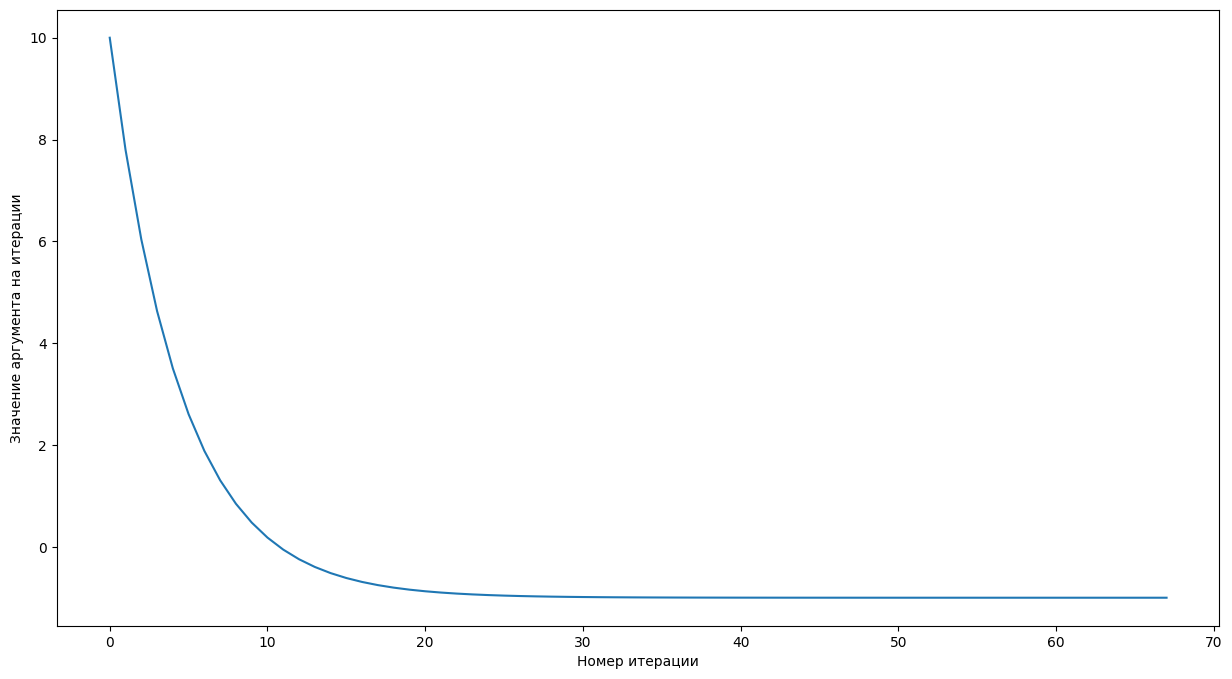

In [ ]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [ ]:
def get_min_with_rmsprop(func, gradient, x0, num_steps, lr, beta, threshold, epsilon=1e-4):
    """
    Выполняет поиск минимума функции при помощи алгоритма RMSProp.

    Параметры:
    func (function): Функция, минимум которой требуется найти.
    gradient (function): Функция, вычисляющая градиент функции func.
    x0 (float): Начальная точка поиска.
    num_steps (int): Количество шагов алгоритма.
    lr (float): Скорость обучения (learning rate).
    beta (float): Параметр бета (мера учета инерции).
    threshold (float): Пороговое значение изменения для завершения поиска.
    epsilon (float): Малое число для стабильности (по умолчанию 1e-4).

    Возвращаемое значение:
    list: Список точек, полученных на каждом шаге алгоритма.
    """
    points = [x0]  # Список для хранения точек на каждом шаге
    gamma = 0  # Инициализируем начальное значение гаммы

    for _ in range(num_steps):
        current_x = points[-1]  # Текущая точка

        # Вычисляем градиент функции в текущей точке
        grad = gradient(current_x)

        # Обновляем значение гаммы
        gamma = (1 - beta) * gamma + beta * (grad ** 2)

        # Обновляем точку с учетом градиента, скорости обучения и гаммы
        new_x = current_x - (lr / (gamma + epsilon) ** 0.5) * grad

        # Добавляем новую точку в список
        points.append(new_x)

        # Вычисляем изменение между текущей и новой точкой
        change = abs(new_x - current_x)

        # Проверяем условие завершения поиска
        if change < threshold:
            break

    return points


In [ ]:
# Определяем функцию, градиент которой нужно вычислить
def func(x):
    return x**2 + 2*x + 1

# Определяем градиент функции func
def gradient(x):
    return 2*x + 2

# Начальная точка, количество шагов, скорость обучения, параметр бета и пороговое значение
x0 = 5
num_steps = 100
lr = 0.1
beta = 0.9
threshold = 1e-6

# Выполняем поиск минимума при помощи алгоритма RMSProp
history_rmsprop = get_min_with_rmsprop(func, gradient, x0, num_steps, lr, beta, threshold)

# Выводим результаты
for i, point in enumerate(history_rmsprop):
    print(f"Шаг {i}: x = {point}, y = {func(point)}")


Шаг 0: x = 5, y = 36
Шаг 1: x = 4.894590785328181, y = 34.7462005264759
Шаг 2: x = 4.794251482462345, y = 33.573350242017085
Шаг 3: x = 4.694390955777867, y = 32.426088357244765
Шаг 4: x = 4.594581817865411, y = 31.299345716790246
Шаг 5: x = 4.4947810812790046, y = 30.192619131181665
Шаг 6: x = 4.394984492540013, y = 29.105857674747224
Шаг 7: x = 4.29519174150226, y = 28.039055579273732
Шаг 8: x = 4.1954029262587476, y = 26.992211566177957
Шаг 9: x = 4.095618193980275, y = 25.965324778822804
Шаг 10: x = 3.995837704947996, y = 24.95839437418006
Шаг 11: x = 3.8960616295430706, y = 23.97141948028395
Шаг 12: x = 3.796290148658927, y = 23.00439919012267
Шаг 13: x = 3.696523454537327, y = 22.057332559019226
Шаг 14: x = 3.5967617517324557, y = 21.130218602190435
Шаг 15: x = 3.4970052581839965, y = 20.223056292134515
Шаг 16: x = 3.3972542064100915, y = 19.335844555791244
Шаг 17: x = 3.29750884483619, y = 18.468582271445285
Шаг 18: x = 3.197769439278737, y = 17.621268265342522
Шаг 19: x = 3.098

In [ ]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = get_min_with_rmsprop(func, gradient, 0, num_steps, lr, beta, threshold)
history_rmsprop_2 = get_min_with_rmsprop(func, gradient, 2, num_steps, lr, beta, threshold)

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

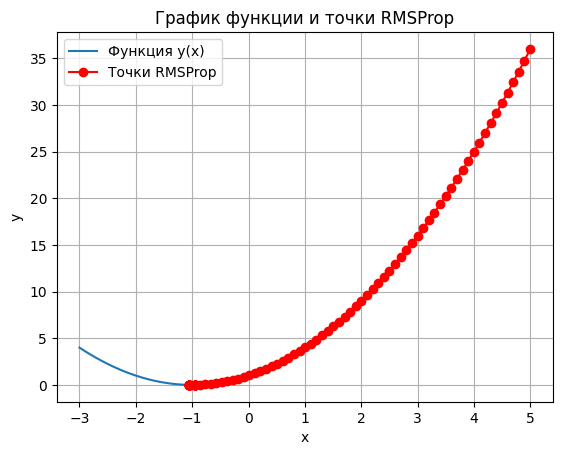

In [ ]:
# Выполняем поиск минимума при помощи алгоритма RMSProp
history_rmsprop = get_min_with_rmsprop(func, gradient, x0, num_steps, lr, beta, threshold)

# Генерируем значения x для построения графика функции
x_values = [x / 10 for x in range(-30, 11)]

# Генерируем соответствующие значения y для построения графика функции
y_values = [func(x) for x in x_values]

# Генерируем значения y для точек, полученных на каждом шаге алгоритма
y_history = [func(x) for x in history_rmsprop]

# Построение графика
plt.plot(x_values, y_values, label='Функция y(x)')
plt.plot(history_rmsprop, y_history, 'ro-', label='Точки RMSProp')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции и точки RMSProp')
plt.legend()
plt.grid()
plt.show()

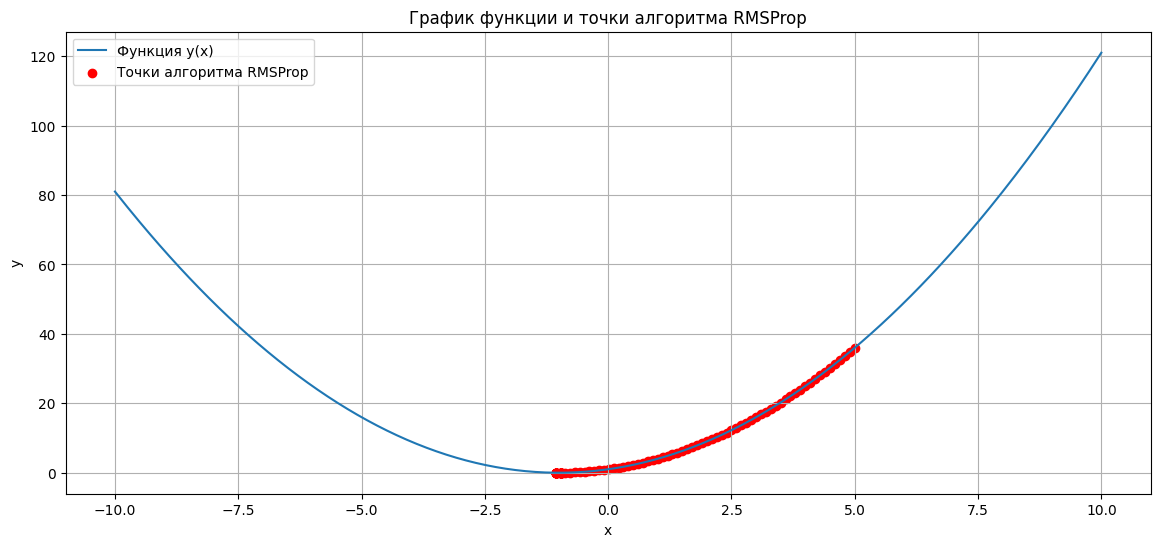

In [ ]:
import numpy as np

# Выполняем поиск минимума при помощи алгоритма RMSProp
history_rmsprop = get_min_with_rmsprop(func, gradient, x0, num_steps, lr, beta, threshold)

# Создаем массив значений x для построения графика функции
x_vals = np.linspace(-10, 10, 400)
y_vals = func(x_vals)

# Создаем график
plt.figure(figsize=(14, 6))
plt.plot(x_vals, y_vals, label='Функция y(x)')
plt.scatter(history_rmsprop, [func(point) for point in history_rmsprop], color='red', label='Точки алгоритма RMSProp')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции и точки алгоритма RMSProp')
plt.legend()
plt.grid()
plt.show()